# Calculate moduli from elastic stiffness tensors

**Instruction**
The aim of this notebook is to obtain moduli calculated from elastic stiffness tensors.  
Execution of the following code requires `stiffness_tensors_rev.csv`.

**Contents**
1. Read and split dataset for each method
1. Visualize scatter plot

## 1. Read and split dataset for each method

In [1]:
import pandas as pd
import numpy as np
from utility import *
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error
plt.rcParams["font.family"] = 'Arial'
plt.rcParams["font.size"] = 14

In [2]:
df = pd.read_csv('../dataset/stiffness_tensors_rev.csv')
df.head()

,Compound,subname,Method,C11,C12,C13,C14,C15,C16,C21,...,C53,C54,C55,C56,C61,C62,C63,C64,C65,C66
0,"1,2,4,5-tetrabromobenzene",Dye,Exp,14.25,12.58,5.24,0.0,4.94,0.0,12.58,...,-0.26,0.0,4.98,0.0,0.0,0.0,0.0,5.87,0.0,10.51
1,"1,3-dinitrobenzene",Sarkar,Exp,10.70,6.30,1.95,0.0,0.00,0.0,6.30,...,0.00,0.0,2.04,0.0,0.0,0.0,0.0,0.00,0.0,5.31
2,"1,3,5-trichlorobenzene",Swans,Exp,8.03,4.47,3.85,0.0,0.00,0.0,4.47,...,0.00,0.0,3.75,0.0,0.0,0.0,0.0,0.00,0.0,3.38
3,3-nitroaniline,Bain,Exp,13.91,6.27,9.73,0.0,0.00,0.0,6.27,...,0.00,0.0,12.17,0.0,0.0,0.0,0.0,0.00,0.0,4.26
4,acenaphthene,Chatterjee,Exp,11.05,-1.93,3.34,0.0,0.00,0.0,-1.93,...,0.00,0.0,3.69,0.0,0.0,0.0,0.0,0.00,0.0,4.87


In [3]:
moduli = ['E_V', 'E_R', 'E_H', 'E_RH', 'K_V', 'K_R', 'K_H', 'G_V', 'G_R', 'G_H', 'n_V', 'n_R', 'n_H', 'A_L']
for item in moduli:
    df[item] = ''
for i in range(df.shape[0]):
    # with np.errstate(divide='ignore', invalid='ignore'):
    res = stiffnesstensor2modulus(np.array(df.iloc[i,3:39]).reshape(6,6))
    # if np.isnan(res).any():
    #     continue
    for j, item in enumerate(moduli):
        df.at[i, item] = res[j]
df = df.dropna()
df = df.reset_index(drop=True)

C:\Users\s0928\Box Sync\Personal\同期資料\_Elastic tensors by NNP\code\utility.py:47: RuntimeWarning: invalid value encountered in log
  A_L = np.sqrt(np.log(K_V/K_R)**2 + 5*np.log(G_V/G_R)**2)


In [4]:
df.head()

,Compound,subname,Method,C11,C12,C13,C14,C15,C16,C21,...,K_V,K_R,K_H,G_V,G_R,G_H,n_V,n_R,n_H,A_L
0,"1,2,4,5-tetrabromobenzene",Dye,Exp,14.25,12.58,5.24,0.0,4.94,0.0,12.58,...,9.328889,5.414015,7.371452,5.805333,1.587315,3.696324,0.242306,0.366458,0.304382,2.950196
1,"1,3-dinitrobenzene",Sarkar,Exp,10.70,6.30,1.95,0.0,0.00,0.0,6.30,...,7.238889,7.0643,7.151595,4.399333,3.411737,3.905535,0.24732,0.292006,0.269663,0.569003
2,"1,3,5-trichlorobenzene",Swans,Exp,8.03,4.47,3.85,0.0,0.00,0.0,4.47,...,5.7,5.550581,5.62529,3.104,2.941551,3.022775,0.269551,0.274804,0.272177,0.123099
3,3-nitroaniline,Bain,Exp,13.91,6.27,9.73,0.0,0.00,0.0,6.27,...,11.843333,6.114307,8.97882,5.306,1.899101,3.60255,0.305098,0.35927,0.332184,2.3907
4,acenaphthene,Chatterjee,Exp,11.05,-1.93,3.34,0.0,0.00,0.0,-1.93,...,4.245556,4.065396,4.155476,4.359333,3.973707,4.16652,0.117513,0.131379,0.124446,0.211595


In [5]:
df_exp = df[df['Method'].str.contains('Exp')]
df_hf = df[df['Method'].str.contains('S-HF-3c')]
df_dft = df[df['Method'].str.contains('DFT')]
df_nnp = df[df['Method'].str.contains('NNP')]

## 2. Visualize scatter plot

In [6]:
def plotdata(df_exp, df_calc, prop):
    y_exp = []
    y_calc = []
    names = []
    for i, name in enumerate(df_exp['Compound']):
        if name in list(df_calc['Compound']):
            y_calc.append(df_calc[df_calc['Compound']==name][prop].values[0])
            y_exp.append(df_exp.loc[i, prop])
            names.append(name)
    return y_exp, y_calc, names

In [9]:
def visuzalize(df_exp, df_calc, text=False, figname=None):
    fig = plt.figure(figsize=(12,15))
    for i, item in enumerate(moduli):
        ax = fig.add_subplot(5, 3, i+1)
        y_exp, y_calc, names = plotdata(df_exp, df_calc, item)
        ax.scatter(y_exp, y_calc)
        ax.plot([min(y_exp), max(y_exp)], [min(y_exp), max(y_exp)], c='k', linestyle='dashed')
        # ax.plot([min(y_calc), max(y_calc)], [min(y_calc), max(y_calc)], c='k', linestyle='dashed')
        if 'E' in item or 'K' in item or 'G' in item:
            ax.set(title=item, xlabel=f'Exp. ${item}$ (GPa)', ylabel=f'Calc. ${item}$ (GPa)')
        else:
            ax.set(title=item, xlabel=f'Exp. ${item}$', ylabel=f'Calc. ${item}$')
        text = f'MAE: {mean_absolute_error(y_exp, y_calc):.2f}'
        ax.text(0.1, 0.95, text, transform=ax.transAxes, horizontalalignment='left', verticalalignment='top')
        if text is True:
            for i, name in enumerate(names):
                ax.text(y_exp[i], y_calc[i], name)
    fig.tight_layout()
    if figname is not None:
        fig.savefig(figname, dpi=300)
    fig.show()

C:\Users\s0928\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


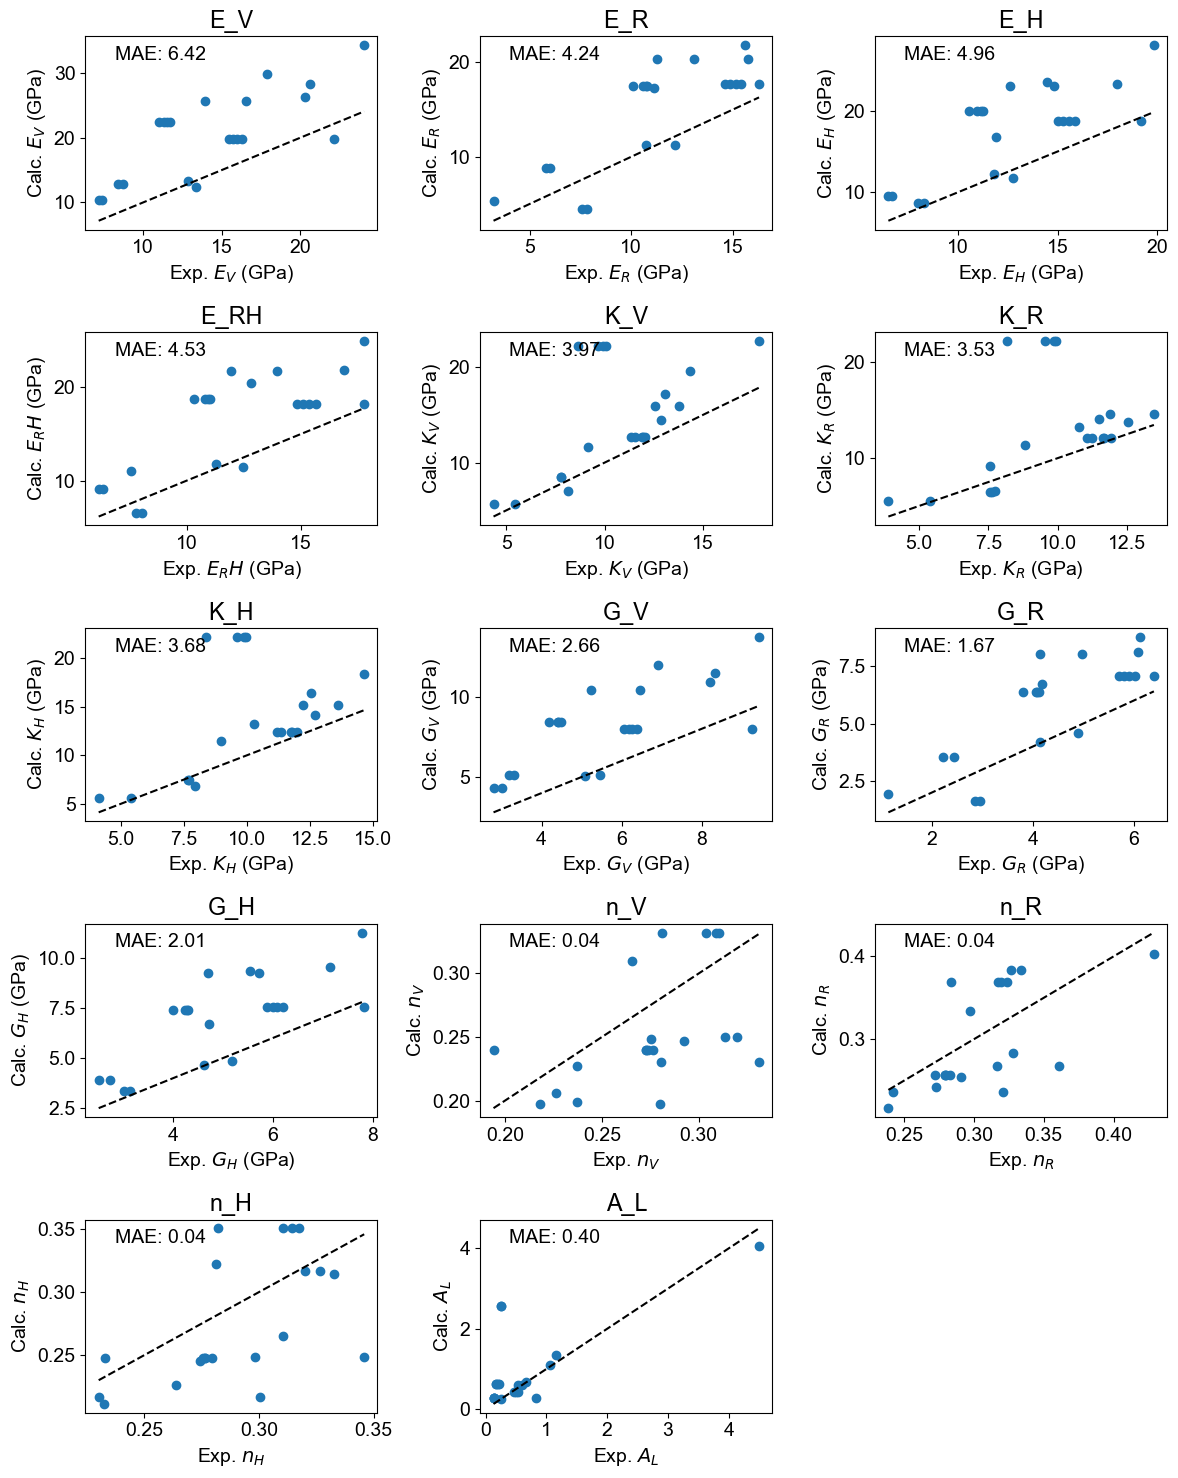

In [12]:
visuzalize(df_exp, df_dft, figname='figures/Summary_DFT.png')

In [82]:
df.to_csv('./modulus.csv')

In [25]:
r2_score(y_exp, y_calc)

NameError: name 'y_exp' is not defined

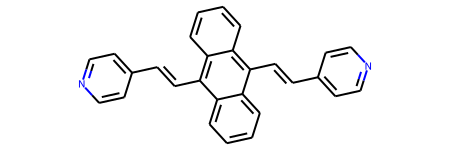

In [92]:
from rdkit import Chem
smi = 'C1=CC=C2C(=C1)C(=C3C=CC=CC3=C2C=CC4=CC=NC=C4)C=CC5=CC=NC=C5'
mol = Chem.MolFromSmiles(smi)
mol

In [86]:
from rdkit.Chem import AllChem, DataStructs, Descriptors, Draw,  ReducedGraphs, MACCSkeys
vector = np.zeros((1,))
mol = Chem.MolFromSmiles(smi)
DataStructs.ConvertToNumpyArray(AllChem.GetMACCSKeysFingerprint(mol), vector)

In [90]:
print(vector)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0.]
